## Evaluate Dataset 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib
from scipy.stats import skew
"""plt.style.use('seaborn-v0_8')
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})"""

import seaborn as sns
#plt.style.use('seaborn-v0_8')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.weight': 'bold'
})
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [18, 16]
colors = {
    'withoutimu' : 'seagreen', 
    'withimu' : 'steelblue'
}


In [3]:
def load_histograms(file_path:str):     
    num_bins = 256

    hist_list = []
    hist_list_mod = []
    skewness = []

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

    for image in os.listdir(file_path):
        img = cv2.imread(file_path + image)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe_img = clahe.apply(gray_img)

        hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 256])
        hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 256])

        skewness.append(skew(hist, axis=0, bias=True)) 

        hist_list.append(hist)
        hist_list_mod.append(hist_mod)

    hist_array = np.array(hist_list)
    mean_hist = np.mean(hist_array, axis=0)

    hist_array_mod = np.array(hist_list_mod)
    mean_hist_mod = np.mean(hist_array_mod, axis=0)
    return mean_hist, mean_hist_mod

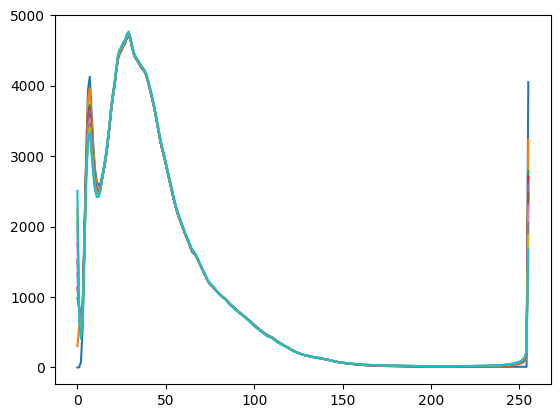

In [4]:
time_factors = ['20', '8', '7', '6', '5', '4', '3', '2-5', '2']
hist, _ = load_histograms('/home/cm2113/workspace/Datasets/tumvi/room/dataset-room1_512_16/dso/cam0/images/')
plt.plot(hist, label='0.0') 
for time in time_factors:
    hist, _ = load_histograms(f'/home/cm2113/workspace/Datasets/tumvi/room/dataset-room1_512_16_{time}/dso/cam0/images/')
    plt.plot(hist, label=time)
plt.legend 
plt.show()


In [28]:
file_path = '/home/cm2113/workspace/Datasets/tumvi/room/dataset-room1_512_16/dso/cam0/images/'

num_bins = 512

hist_list = []
hist_list_mod = []
skewness = []

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

for image in os.listdir(file_path):
    img = cv2.imread(file_path + image)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe_img = clahe.apply(gray_img)
    
    hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 512])
    hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 512])
    
    skewness.append(skew(hist, axis=0, bias=True)) 
    
    hist_list.append(hist)
    hist_list_mod.append(hist_mod)

hist_array = np.array(hist_list)
mean_hist_1 = np.mean(hist_array, axis=0)
                         
hist_array_mod = np.array(hist_list_mod)
mean_hist_mod = np.mean(hist_array_mod, axis=0)
                         

In [7]:
print(f"mean skew: {np.mean(skewness)}")

mean skew: 2.23875093460083


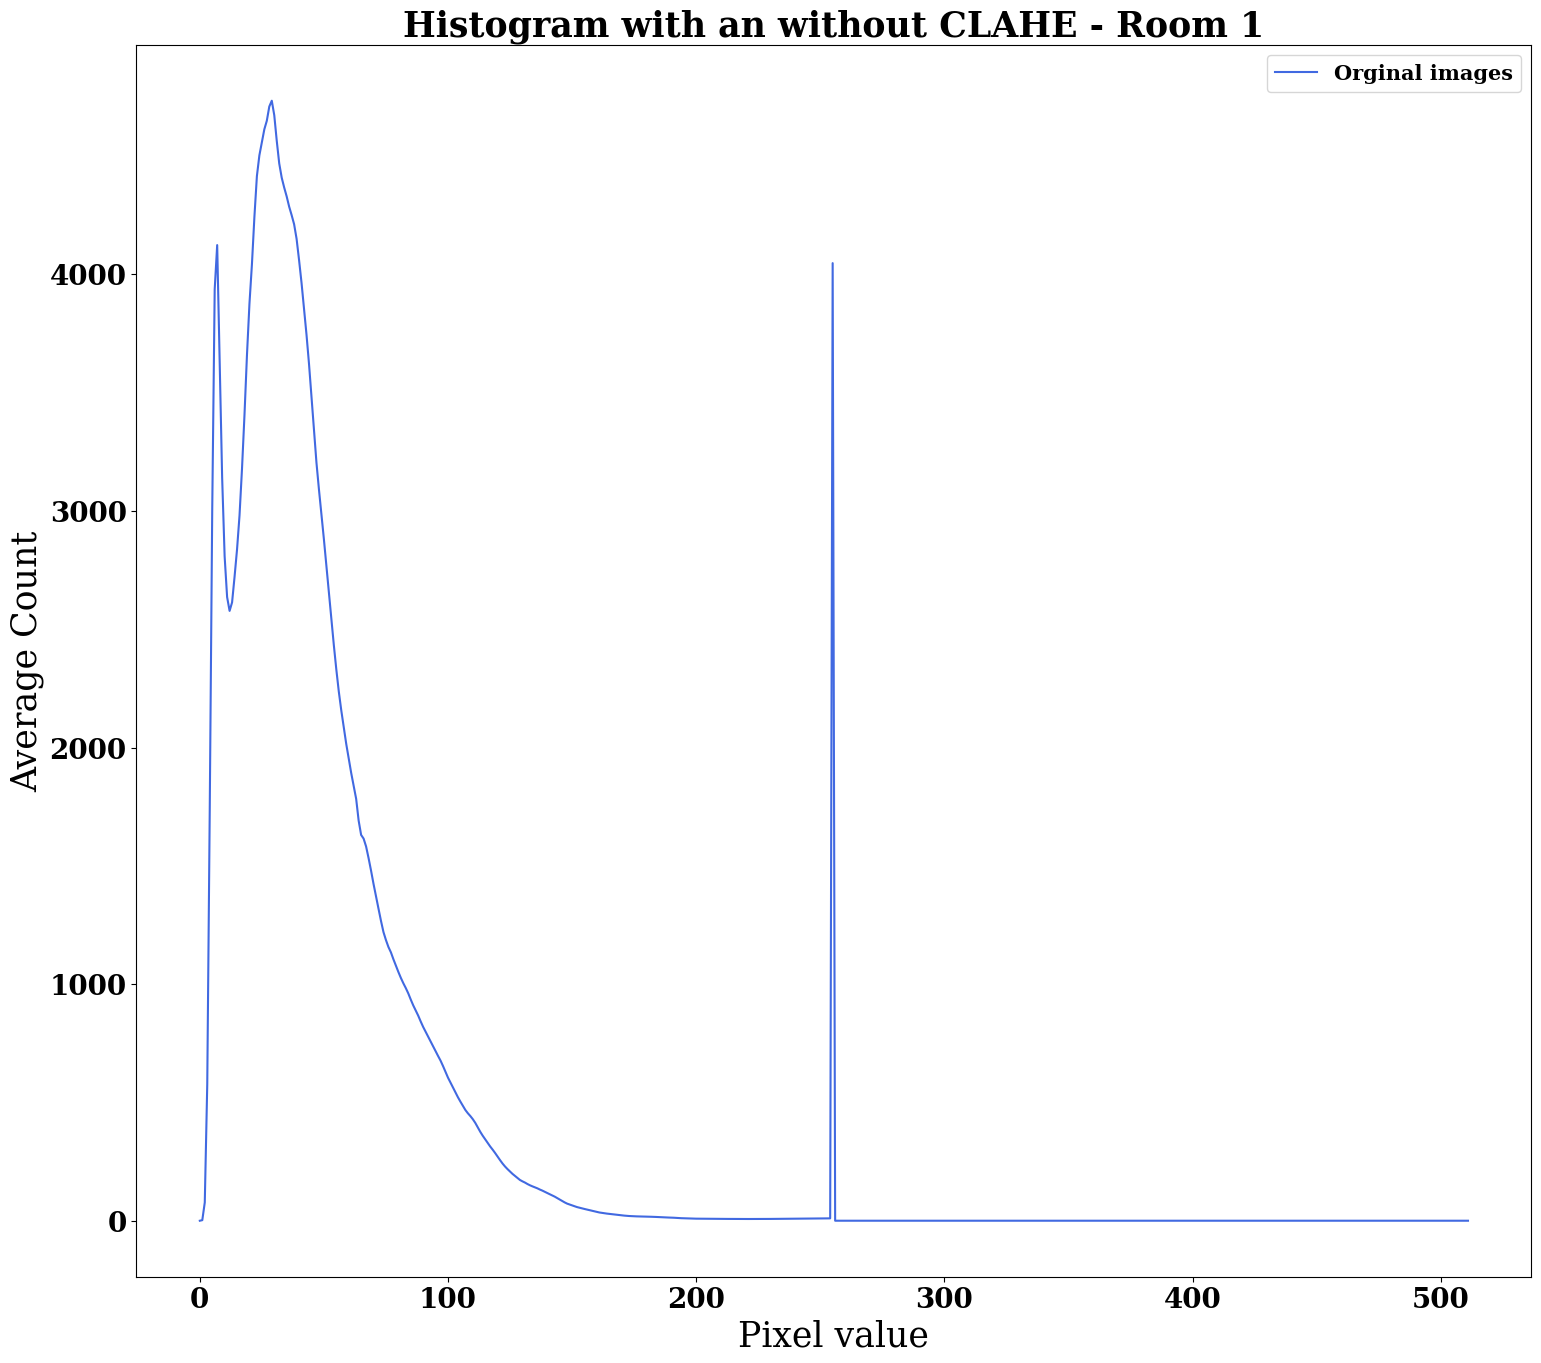

In [30]:
plt.plot(mean_hist_1, label='Orginal images', color='royalblue')
#plt.plot(mean_hist_mod, label='With CLAHE equalization', color='orchid')
plt.legend(fontsize='15')


plt.xlabel(r'Pixel value', fontsize='25') 
plt.ylabel('Average Count', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram with an without CLAHE - Room 1', fontsize='25', fontweight='bold') 
#plt.savefig('imagehist_room1.png', bbox_inches='tight')
plt.show()

In [20]:
file_path = '/home/cm2113/workspace/Datasets/tumvi/room/dataset-room2_512_16/dso/cam0/images/'

num_bins = 256

hist_list = []
hist_list_mod = []
skewness = []

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

for image in os.listdir(file_path):
    img = cv2.imread(file_path + image)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe_img = clahe.apply(gray_img)
    
    hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 256])
    hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 256])
    
    skewness.append(skew(hist, axis=0, bias=True)) 
    
    hist_list.append(hist)
    hist_list_mod.append(hist_mod)

hist_array = np.array(hist_list)
mean_hist_2 = np.mean(hist_array, axis=0)
                         
hist_array_mod = np.array(hist_list_mod)
mean_hist_mod = np.mean(hist_array_mod, axis=0)
                         

In [9]:
print(f"mean skew: {np.mean(skewness)}")

mean skew: 2.1390902996063232


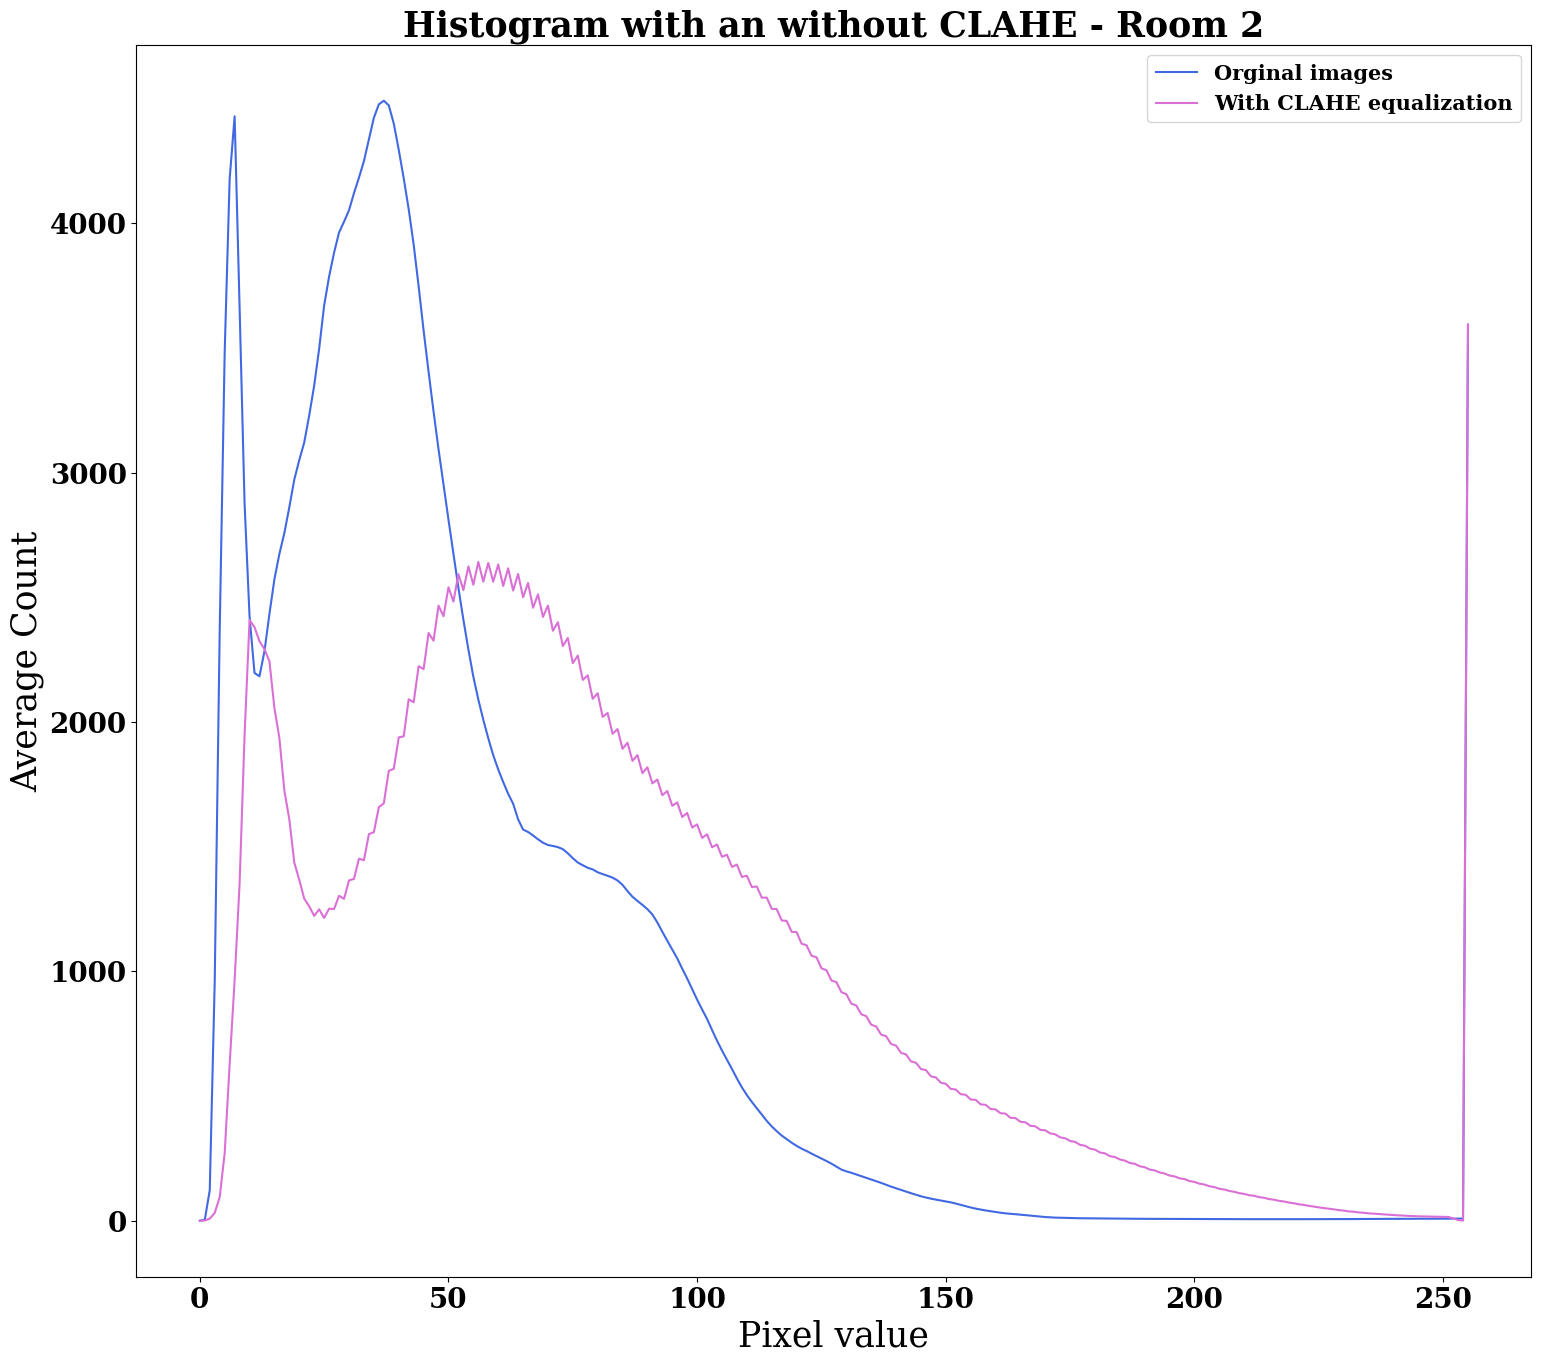

In [22]:
plt.plot(mean_hist_2, label='Orginal images', color='royalblue')
plt.plot(mean_hist_mod, label='With CLAHE equalization', color='orchid')
plt.legend(fontsize='15')


plt.xlabel(r'Pixel value', fontsize='25') 
plt.ylabel('Average Count', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram with an without CLAHE - Room 2', fontsize='25', fontweight='bold') 
plt.savefig('imagehist_room2.png', bbox_inches='tight')
plt.show()

In [25]:
file_path = '/home/cm2113/workspace/Datasets/tumvi/room/dataset-room3_512_16/dso/cam0/images/'

num_bins = 256

hist_list = []
hist_list_mod = []

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

for image in os.listdir(file_path):
    img = cv2.imread(file_path + image)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe_img = clahe.apply(gray_img)
    
    hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 256])
    hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 256])
    
    hist_list.append(hist)
    hist_list_mod.append(hist_mod)

hist_array = np.array(hist_list)
mean_hist_3 = np.mean(hist_array, axis=0)
                         
hist_array_mod = np.array(hist_list_mod)
mean_hist_mod = np.mean(hist_array_mod, axis=0)

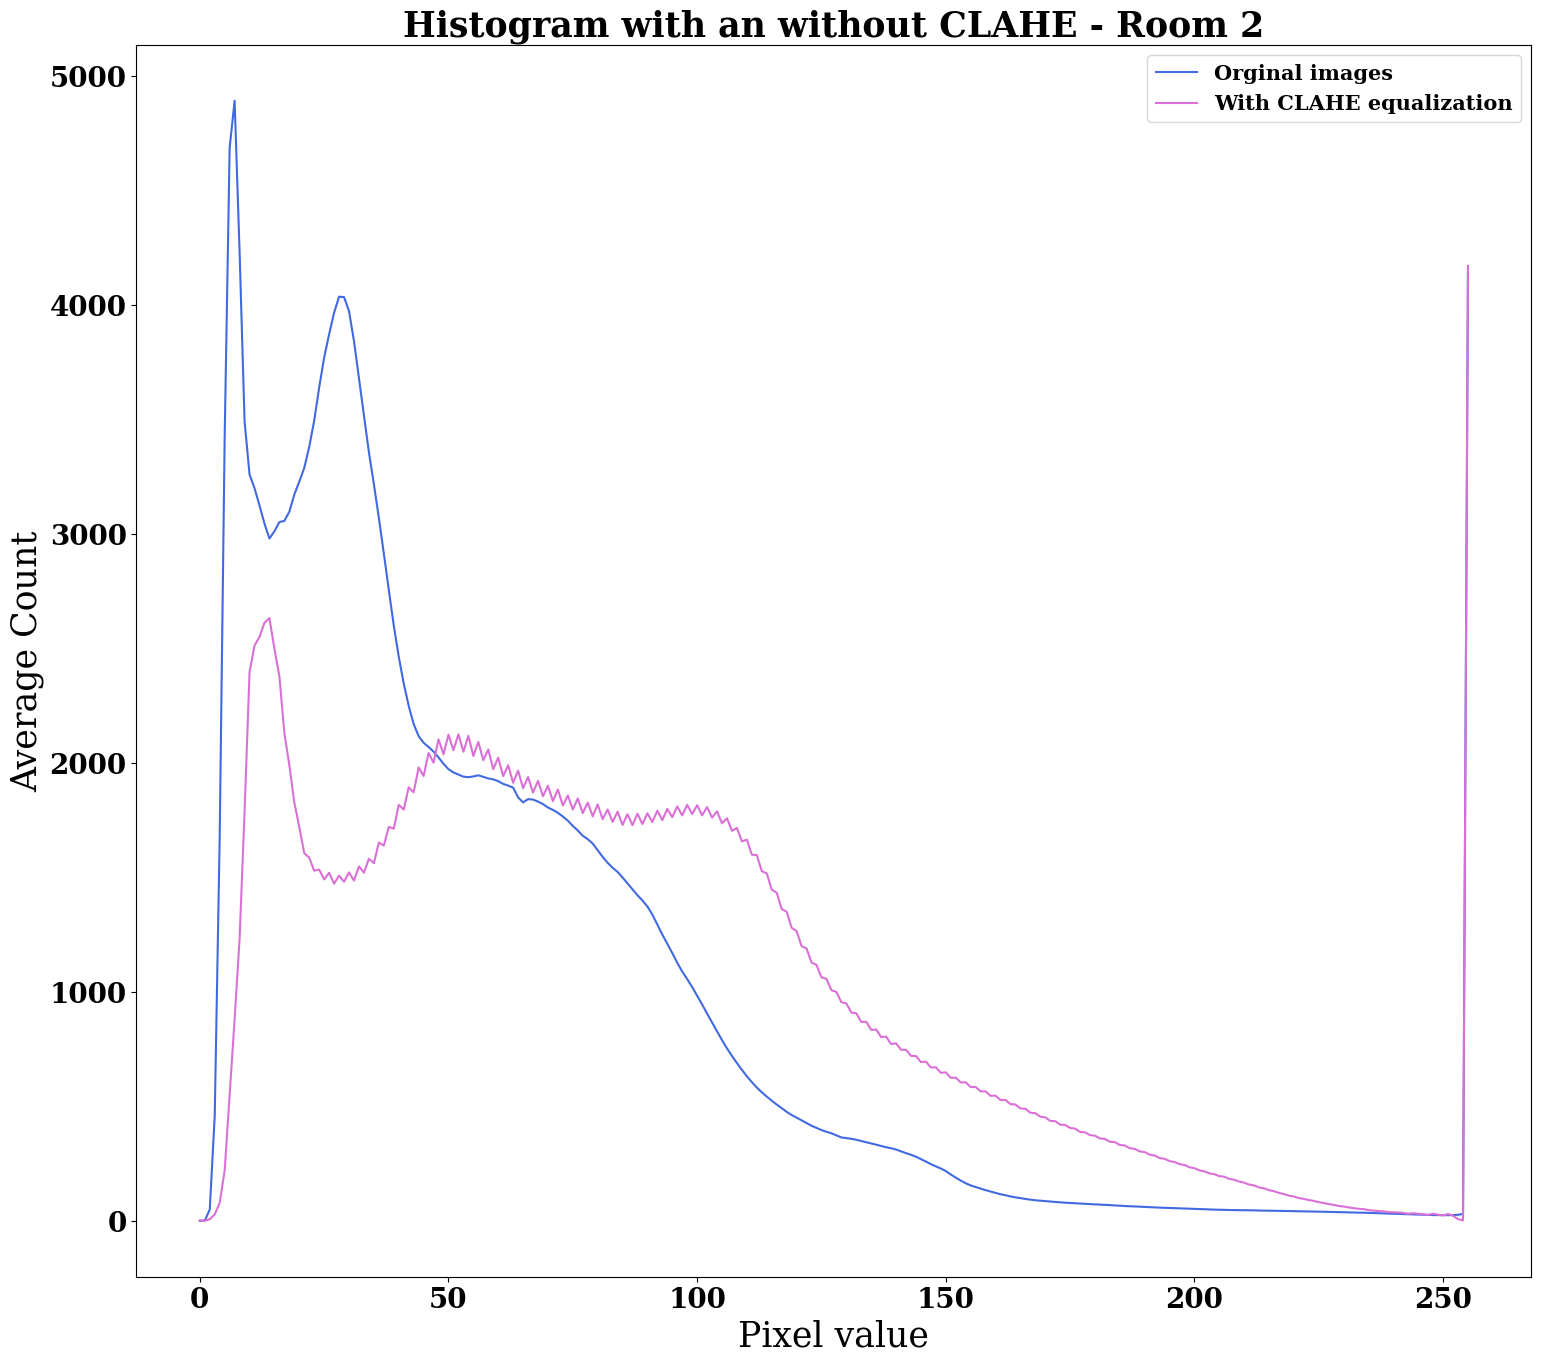

In [26]:
plt.plot(mean_hist_3, label='Orginal images', color='royalblue')
plt.plot(mean_hist_mod, label='With CLAHE equalization', color='orchid')
plt.legend(fontsize='15')


plt.xlabel(r'Pixel value', fontsize='25') 
plt.ylabel('Average Count', fontsize='25') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram with an without CLAHE - Room 2', fontsize='25', fontweight='bold') 
plt.savefig('imagehist_room3.png', bbox_inches='tight')
plt.show()

In [23]:
file_path = '/home/cm2113/workspace/Datasets/tumvi/room/dataset-room4_512_16/dso/cam0/images/'

num_bins = 256

hist_list = []
hist_list_mod = []

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

for image in os.listdir(file_path):
    img = cv2.imread(file_path + image)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe_img = clahe.apply(gray_img)
    
    hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 256])
    hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 256])
    
    hist_list.append(hist)
    hist_list_mod.append(hist_mod)

hist_array = np.array(hist_list)
mean_hist_4 = np.mean(hist_array, axis=0)
                         
hist_array_mod = np.array(hist_list_mod)
mean_hist_mod = np.mean(hist_array_mod, axis=0)

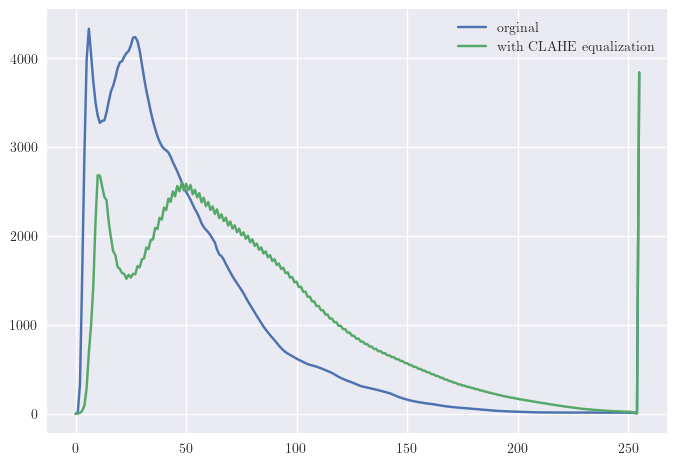

In [24]:
plt.plot(mean_hist_4, label='orginal')
plt.plot(mean_hist_mod, label='with CLAHE equalization')
plt.legend()
plt.show()

In [25]:
file_path = '/home/cm2113/workspace/Datasets/tumvi/room/dataset-room5_512_16/dso/cam0/images/'

num_bins = 256

hist_list = []
hist_list_mod = []

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

for image in os.listdir(file_path):
    img = cv2.imread(file_path + image)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe_img = clahe.apply(gray_img)
    
    hist = cv2.calcHist([gray_img], [0], None, [num_bins], [0, 256])
    hist_mod= cv2.calcHist([clahe_img], [0], None, [num_bins], [0, 256])
    
    hist_list.append(hist)
    hist_list_mod.append(hist_mod)

hist_array = np.array(hist_list)
mean_hist_5 = np.mean(hist_array, axis=0)
                         
hist_array_mod = np.array(hist_list_mod)
mean_hist_mod = np.mean(hist_array_mod, axis=0)

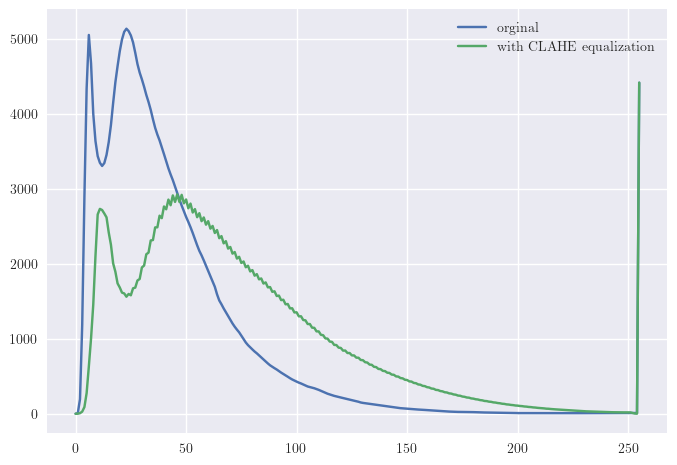

In [26]:
plt.plot(mean_hist_5, label='orginal')
plt.plot(mean_hist_mod, label='with CLAHE equalization')
plt.legend()
plt.show()

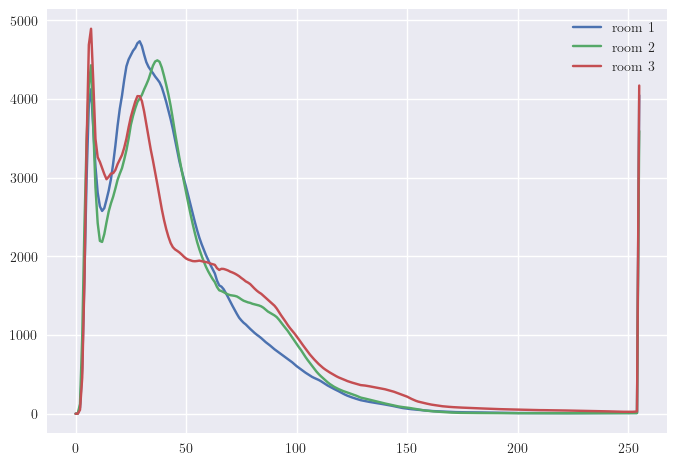

In [32]:
plt.plot(mean_hist_1, label='room 1')
plt.plot(mean_hist_2, label='room 2')
plt.plot(mean_hist_3, label='room 3')
plt.legend()
plt.show()